<a href="https://colab.research.google.com/github/shivanshgarg22/AI-SHIVANSH-OM-final-project/blob/main/AI_Shivansh%2BOm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have a map of Maharashtra and we are finding shortest path between two cities

Algorithm used- A*(used to approximate/find shortest path in map avoiding hindrances)

Cities represent as nodes of Graph


In [45]:
import math # math library is just for using "sqrt" function to calculate Euclidean distane

In [46]:
# Coordinates (x, y) of cities
cities = { # dictionary in which 'cities' are keys and and (x,y) are coordinates
    'Pune': (0, 0),
    'Mumbai': (0, 5),
    'Thane': (2, 10),
    'Nashik': (7, 5),
    'Nagpur': (10, 0)
}
# Cities represented as a point in 2d (x,y) space
# We will calculate the heuristic (straight-line distance)

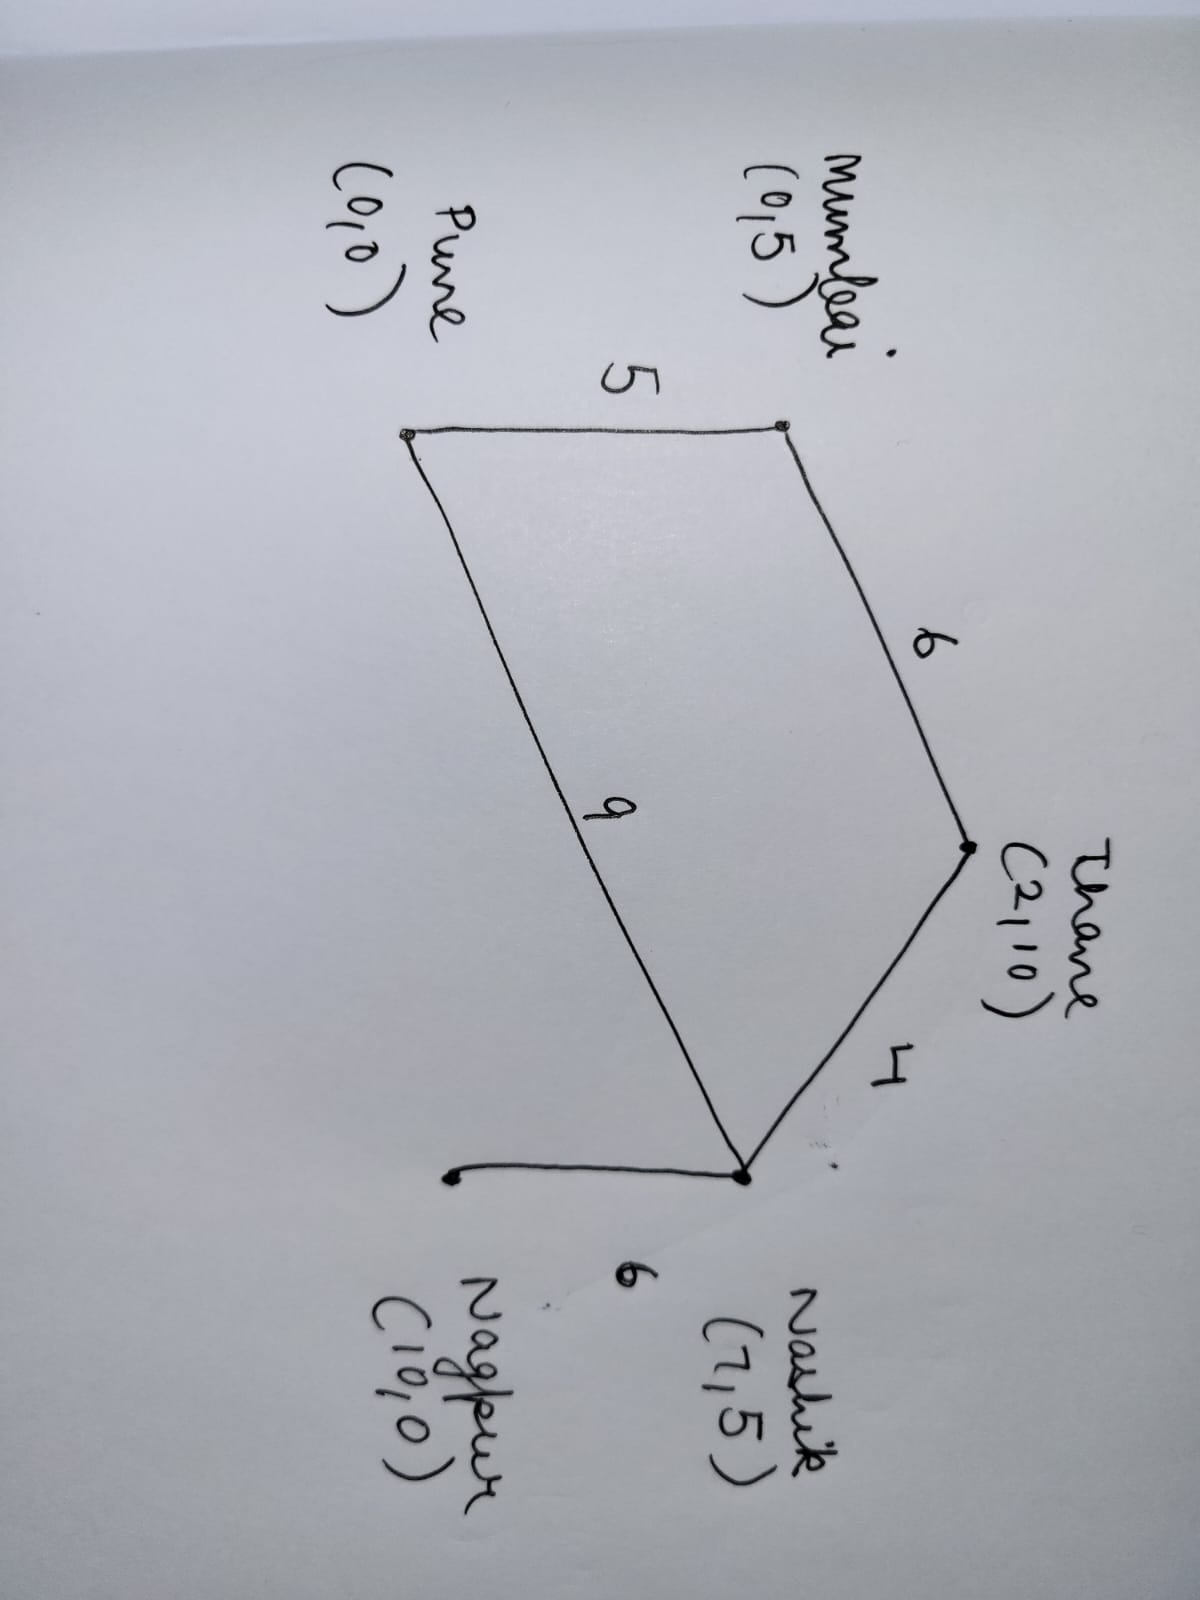

In [ ]:
# Graph representing the nodes(cities) and distances between cities

graph = { # graphical nodes are represented in form of "adjacency list"
    'Pune': [('Mumbai', 5), ('Nashik', 9)],
    'Mumbai': [('Pune', 5), ('Thane', 6)],
    'Thane': [('Mumbai', 6), ('Nashik', 4)],
    'Nashik': [('Pune', 9), ('Thane', 4), ('Nagpur', 6)],
    'Nagpur': [('Nashik', 6)]
} # Each city is a Key and value are tuples(neighbourcity,distance)

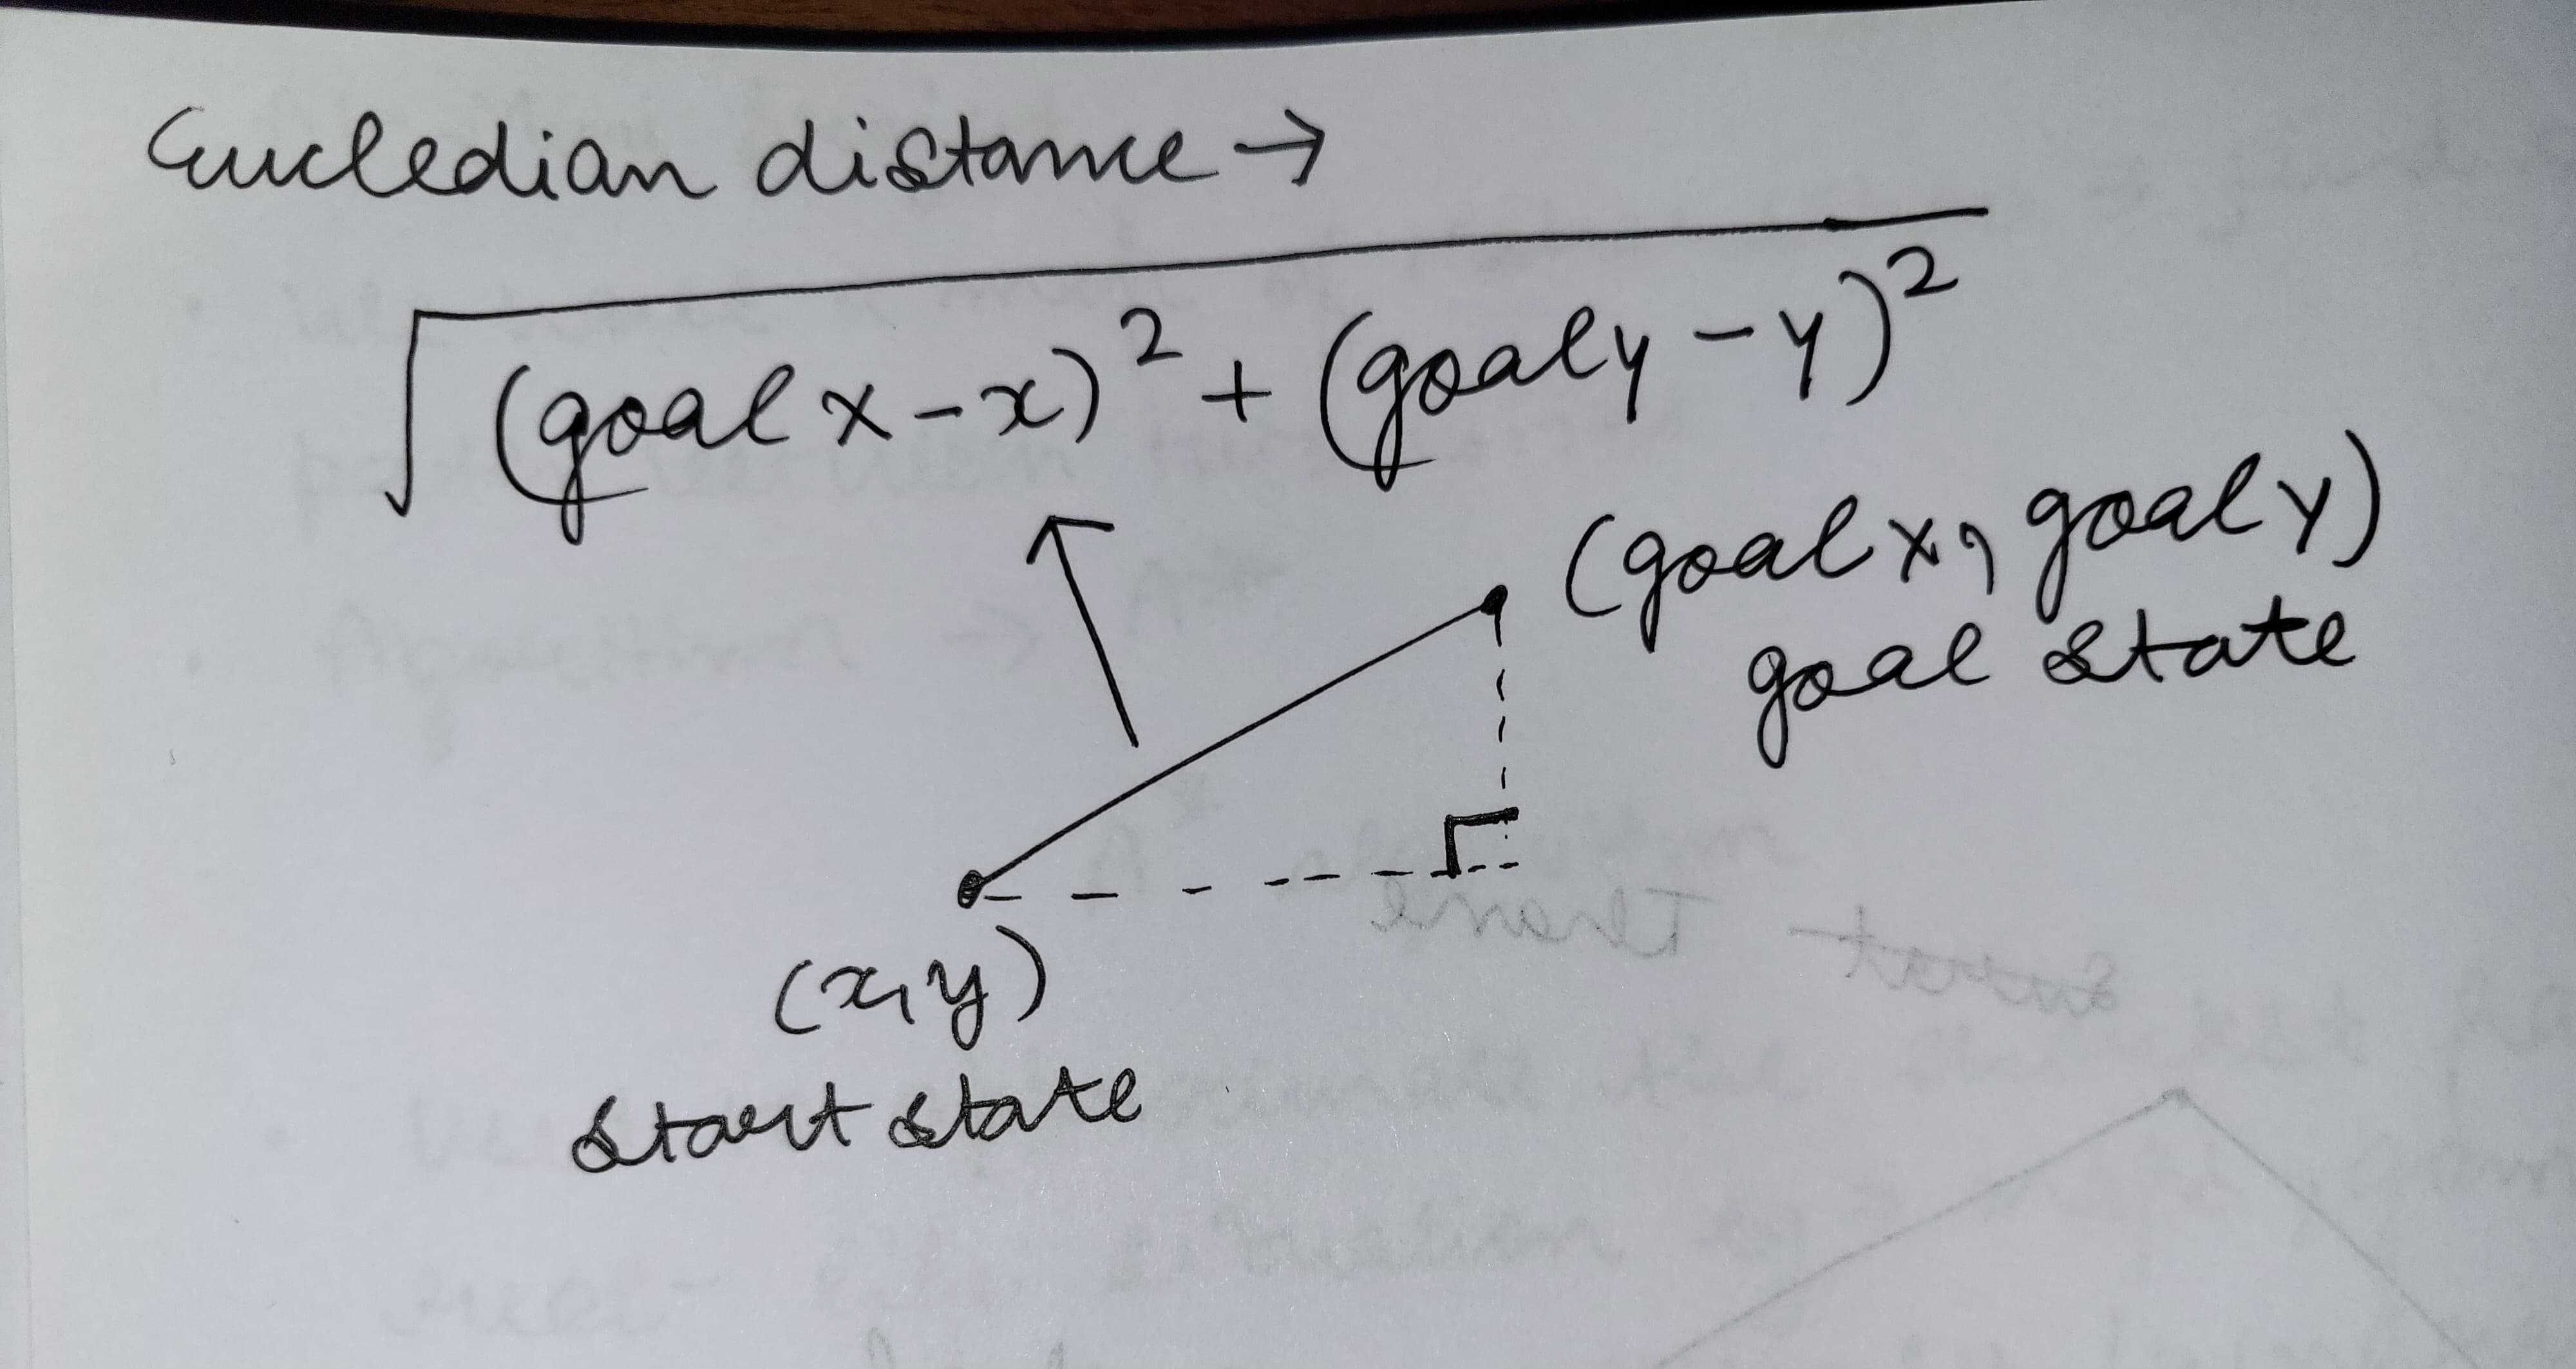

In [ ]:
# Function to calculate straight-line distance (Euclidean) from any city to the goal
def calculateheuristics(cities, goal):   # cities->dictionary created above
    heuristics = {}
    goalx, goaly = cities[goal]  # Get goal coordinates , It would fetch the coordinates of goal state from above mentioned dictionary
    for city, (x, y) in cities.items():
        # Euclidean formula
        heuristics[city] = math.sqrt((goalx - x) ** 2 + (goaly - y) ** 2) # heuristic of each city is assigned the value as eucledian distance between that city and goal city
    return heuristics  # It will return the whole dictionary
  # It computes the Heuristic values h(n) in A* algorithm , Euclidean distance is calculate between ecah city to goal city

In [ ]:
# Assign heuristic values for each city toward the goal 'Nagpur'
# Here we called a function calculateheuristics
heuristics = calculateheuristics(cities, 'Nagpur')
# we are saying that how much cost would would be incurred in giving from given city to goal city (here nagpur)

In [ ]:
# Heuristic function returns the precomputed heuristic for node `n`
def heuristic(n):   # n City name eg heuristic('Mumbai) for calling
    return heuristics[n]


In [ ]:
# A* Algorithm function
def astaralgo(startnode, stopnode): # stopnode->goalnode
    openset = set([startnode])  # Set of nodes to explore , it consists all nodes that are yet to be explored
    closedset = set()            # Set of already-explored nodes , it wont'be revisited
    g = {}                        # Dictionary: cost from start node to current node
    parents = {}                  # Dictionary: parent/preceding node of each node for path reconstruction

    g[startnode] = 0             # Cost to reach start_node is 0
    parents[startnode] = startnode  # Start node has no parent

    while openset:
        n = None  # Best node to expand next

        # Find node `n` in open_set with lowest f(n) = g(n) + h(n)
        for v in openset:
            if n is None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v

        if n is None:
            print('Path does not exist!')
            return None

        # If goal node is found, reconstruct the path
        if n == stopnode:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(startnode)
            path.reverse()

            print('Path found:', path)
            return path

        # Explore neighbors of node `n`
        for (m, cost) in graph.get(n, []):
            # Skip already evaluated nodes
            if m in closedset:
                continue

            # If `m` not in open_set, or found a cheaper path
            if m not in openset or g[n] + cost < g[m]:
                g[m] = g[n] + cost
                parents[m] = n
                openset.add(m)

        # Done exploring `n`
        openset.remove(n)
        closedset.add(n)

    print('Path does not exist!')
    return None




In [ ]:
astaralgo('Mumbai', 'Nagpur')

Path found: ['Mumbai', 'Thane', 'Nashik', 'Nagpur']


['Mumbai', 'Thane', 'Nashik', 'Nagpur']